In [1]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor

In [2]:
def metrics_print(test_y, test_y_hat):
    r2 = r2_score(test_y, test_y_hat)
    print("R2 ", r2)
    # MAE
    print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

    #MSE
    print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

    #RMSE
    print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))


    return

In [3]:
import pwlf

In [4]:
lc2 = pd.read_csv("Feb15/LC3_18Jan.csv")

/home/jayati/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
lc2

,created_at,PM10_3,PM2.5_3,RH_3,Temp_3,CO_3,NO2_3,NH3_3
0,2020-09-17 19:15:30 IST,19.1,15.1,83.26,27.72,0.48,0.20,2.2
1,2020-09-17 19:16:00 IST,19.0,15.2,83.26,27.74,0.44,0.22,1.96
2,2020-09-17 19:16:30 IST,18.6,15.0,83.35,27.72,0.44,0.24,1.7
3,2020-09-17 19:17:00 IST,18.8,15.8,83.32,27.71,0.44,0.26,1.5
4,2020-09-17 19:17:30 IST,19.3,15.9,83.38,27.71,0.44,0.28,1.36
...,...,...,...,...,...,...,...,...
310693,2021-01-18 18:58:00 IST,77.6,58.8,49.92,27.59,0.53,5.33,0.01
310694,2021-01-18 18:58:30 IST,80.8,60.0,49.95,27.59,0.53,5.28,0.01
310695,2021-01-18 18:59:00 IST,82.7,61.2,49.95,27.58,0.53,5.28,0.01
310696,2021-01-18 18:59:30 IST,79.7,59.8,50.02,27.60,0.53,5.28,0.01


In [6]:
lc2['created_at'] = lc2['created_at'].astype(str).str[:-4]
lc2['created_at'] = pd.to_datetime(lc2['created_at'])

In [7]:
lc2

,created_at,PM10_3,PM2.5_3,RH_3,Temp_3,CO_3,NO2_3,NH3_3
0,2020-09-17 19:15:30,19.1,15.1,83.26,27.72,0.48,0.20,2.2
1,2020-09-17 19:16:00,19.0,15.2,83.26,27.74,0.44,0.22,1.96
2,2020-09-17 19:16:30,18.6,15.0,83.35,27.72,0.44,0.24,1.7
3,2020-09-17 19:17:00,18.8,15.8,83.32,27.71,0.44,0.26,1.5
4,2020-09-17 19:17:30,19.3,15.9,83.38,27.71,0.44,0.28,1.36
...,...,...,...,...,...,...,...,...
310693,2021-01-18 18:58:00,77.6,58.8,49.92,27.59,0.53,5.33,0.01
310694,2021-01-18 18:58:30,80.8,60.0,49.95,27.59,0.53,5.28,0.01
310695,2021-01-18 18:59:00,82.7,61.2,49.95,27.58,0.53,5.28,0.01
310696,2021-01-18 18:59:30,79.7,59.8,50.02,27.60,0.53,5.28,0.01


In [8]:
cpcb = pd.read_csv("Air_pollution/Air-Pollution/Data/Airveda&cpcb_15min.csv")

In [9]:
cpcb['created_at'] = pd.to_datetime(cpcb['created_at'], dayfirst = True)

In [10]:
cpcb

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10
0,0,2020-11-01 00:00:00,82.0,127.0,73,172
1,1,2020-11-01 00:15:00,83.0,125.0,73,172
2,2,2020-11-01 00:30:00,76.0,117.0,73,172
3,3,2020-11-01 01:00:00,81.0,120.5,80,158
4,4,2020-11-01 01:15:00,83.0,118.0,80,158
...,...,...,...,...,...,...
2703,2703,2020-12-06 00:45:00,61.0,103.0,52,109
2704,2704,2020-12-07 11:15:00,57.0,95.0,34,85
2705,2705,2020-12-07 11:30:00,49.0,84.0,34,85
2706,2706,2020-12-07 11:45:00,49.0,81.0,33,84


In [11]:
comb = pd.merge(cpcb, lc2,  
                   on='created_at',  
                   how='inner') 

In [15]:
comb = comb.rename(columns={"PM2.5_3": "PM2.5_2", "PM10_3": "PM10_2", "RH_3":"RH_2", "Temp_3": "Temp_2"})

In [16]:
comb

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10,PM10_2,PM2.5_2,RH_2,Temp_2,CO_3,NO2_3,NH3_3
0,0,2020-11-01 00:00:00,82.0,127.0,73,172,1999.9,999.9,50.70,27.27,1.64,4.35,0.11
1,1,2020-11-01 00:15:00,83.0,125.0,73,172,1999.9,999.9,53.04,27.04,1.7,3.55,0.13
2,2,2020-11-01 00:30:00,76.0,117.0,73,172,1999.9,999.9,52.98,26.87,1.64,3.94,0.13
3,3,2020-11-01 01:00:00,81.0,120.5,80,158,1999.9,999.9,54.56,26.50,1.64,3.69,0.13
4,4,2020-11-01 01:15:00,83.0,118.0,80,158,1999.9,999.9,56.54,26.28,1.64,3.01,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2681,2020-12-05 18:45:00,48.0,95.0,51,148,82.4,40.2,49.79,23.34,0.58,6.76,0.03
2596,2682,2020-12-05 19:00:00,49.0,99.0,51,148,79.1,38.9,50.21,22.97,0.58,6.89,0.02
2597,2705,2020-12-07 11:30:00,49.0,84.0,34,85,47.2,39.9,49.02,29.62,0.58,2.36,0.08
2598,2706,2020-12-07 11:45:00,49.0,81.0,33,84,47.4,36.7,45.25,30.68,0.53,3.06,0.06


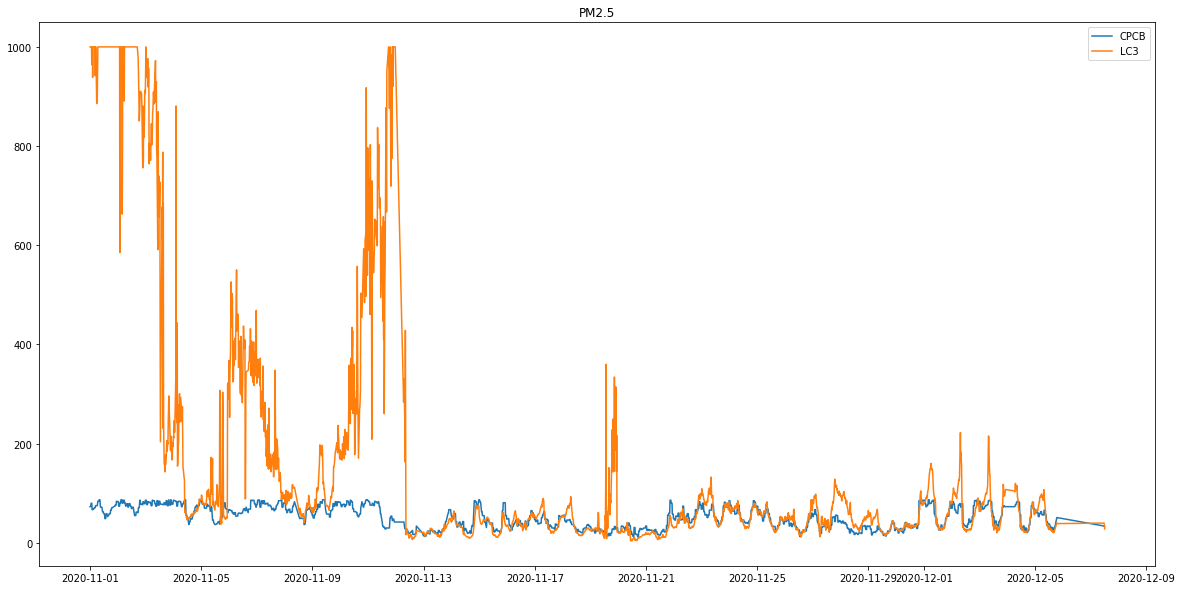

In [19]:

plt.figure(figsize=(20, 10))
plt.title("PM2.5")
plt.plot(comb.created_at, comb.cpcb_pm25)
plt.plot(comb.created_at, comb['PM2.5_2'])
plt.legend(["CPCB", "LC3"])

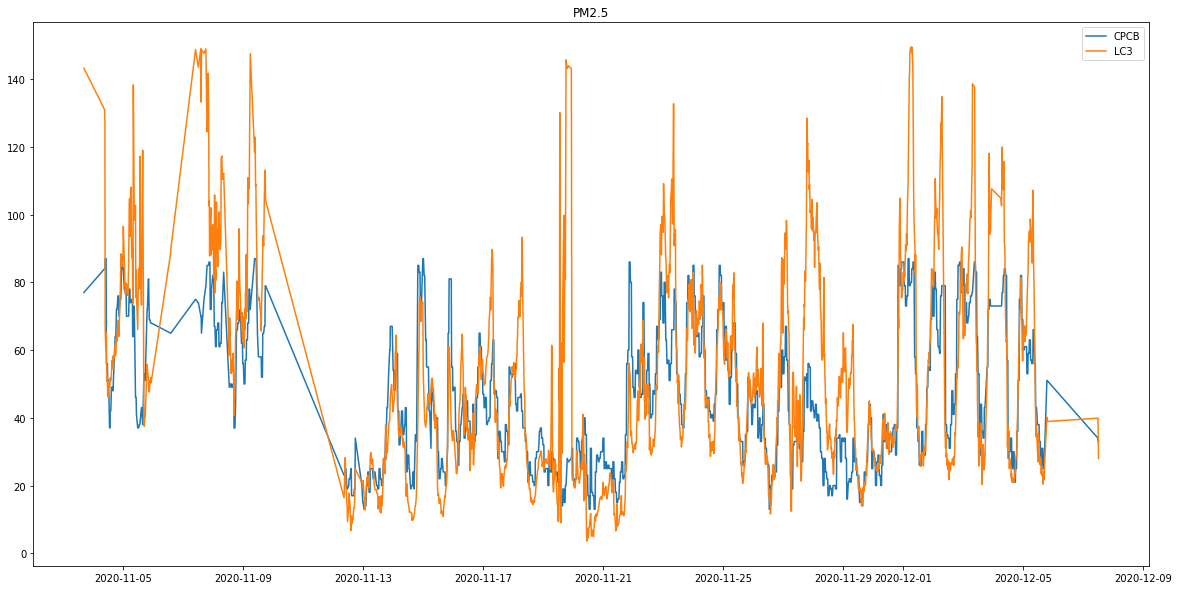

In [21]:
comb = comb[comb['PM2.5_2'] <= 150]
plt.figure(figsize=(20, 10))
plt.title("PM2.5")
plt.plot(comb.created_at, comb.cpcb_pm25)
plt.plot(comb.created_at, comb['PM2.5_2'])
plt.legend(["CPCB", "LC3"])

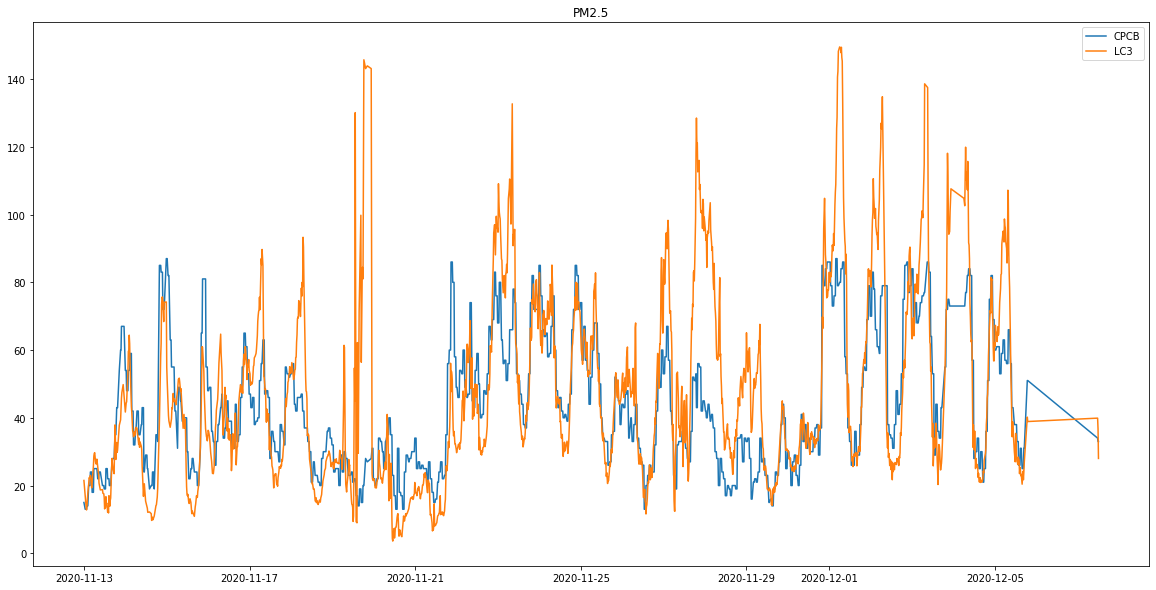

In [22]:
comb = comb[comb['created_at'] >= '2020-11-13 00:00:00']
plt.figure(figsize=(20, 10))
plt.title("PM2.5")
plt.plot(comb.created_at, comb.cpcb_pm25)
plt.plot(comb.created_at, comb['PM2.5_2'])
plt.legend(["CPCB", "LC3"])

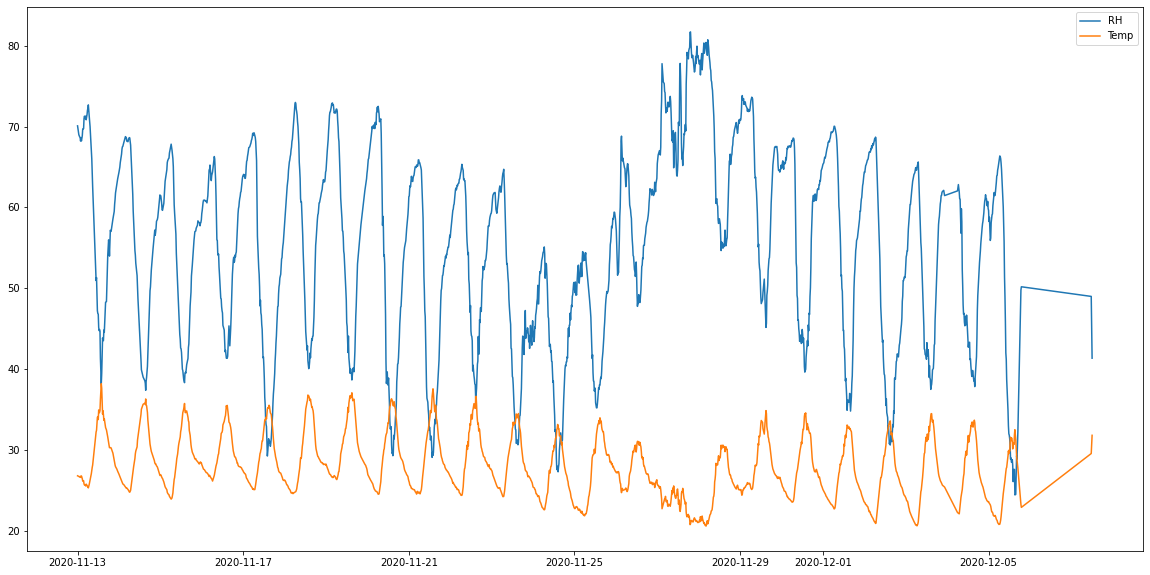

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(comb.created_at, comb['RH_2'])
plt.plot(comb.created_at, comb['Temp_2'])
plt.legend(["RH", "Temp"])

In [24]:
df = comb
msk = (np.random.rand(len(df)) < 0.8)
train = df[msk]
test = df[~msk]
train_x = np.asanyarray(train['PM2.5_2'])
train_y = np.asanyarray(train['cpcb_pm25'])
test_x = np.asanyarray(test['PM2.5_2'])
test_y = np.asanyarray(test['cpcb_pm25'])
x, y = train_x, train_y
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# # fit the data for four line segments
res = my_pwlf.fit(4)
# res = my_pwlf.fitfast(4, pop=3)

R2  0.5960663815915161
MAE of simple linear regression 9.082844446318306
MSE of simple linear regression 150.6222378799633
RMSE of simple linear regression 12.272825179230873


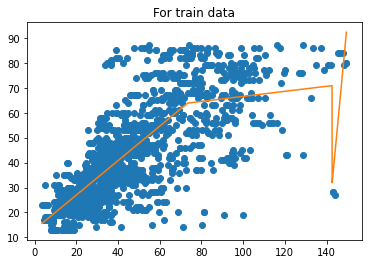

In [25]:
# # predict for the determined points
train_y_hat = my_pwlf.predict(train_x)
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)
metrics_print(train_y, train_y_hat)

# # plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.title("For train data")
plt.show()

R2  0.5826076353785326
MAE of simple linear regression 9.124344667898647
MSE of simple linear regression 152.38451071954663
RMSE of simple linear regression 12.344412125311866


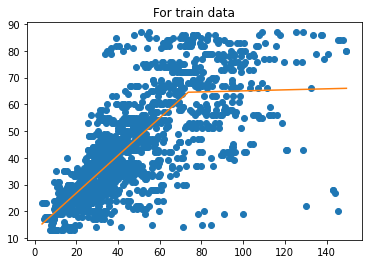

In [28]:
df = comb
msk = (np.random.rand(len(df)) < 0.8)
train = df[msk]
test = df[~msk]
train_x = np.asanyarray(train['PM2.5_2'])
train_y = np.asanyarray(train['cpcb_pm25'])
test_x = np.asanyarray(test['PM2.5_2'])
test_y = np.asanyarray(test['cpcb_pm25'])
x, y = train_x, train_y
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# # fit the data for four line segments
res = my_pwlf.fit(2)
# res = my_pwlf.fitfast(4, pop=3)
# # predict for the determined points
train_y_hat = my_pwlf.predict(train_x)
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)
metrics_print(train_y, train_y_hat)

# # plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.title("For train data")
plt.show()

R2  0.6175137030162541
MAE of simple linear regression 9.11899247872371
MSE of simple linear regression 151.82566693455004
RMSE of simple linear regression 12.321755838132406


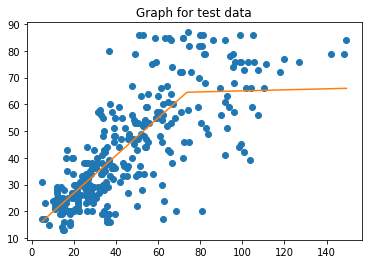

In [29]:
test_y_hat = my_pwlf.predict(test_x)
metrics_print(test_y, test_y_hat) 
# spearman = spearmanr(test_y, test_y_hat)
# spearman1 = spearmanr(train_x, train_y)
# print(f'Test data Spearman correlation of Piecewise linear regression: {spearman[0]:.3}')
# print(f'Train data Spearman correlation of Piecewise linear regression: {spearman1[0]:.3}')
xHat = np.linspace(min(test_x), max(test_x), num=10000)
yHat = my_pwlf.predict(xHat)
# # plot the results

plt.figure()
plt.plot(test_x, test_y, 'o')
plt.plot(xHat, yHat, '-')
plt.title("Graph for test data")
plt.show()

In [30]:
PieceWise_Test_x = test_x
PieceWise_Test_y = test_y
PieceWise_Test_y_hat = test_y_hat

In [31]:
train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['cpcb_pm25']])

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['cpcb_pm25']])
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y.ravel()) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred



R2  0.5840541797291842
MAE of simple linear regression 9.60387320112318
MSE of simple linear regression 165.1072262438169
RMSE of simple linear regression 12.849405676676914
R2  0.435090107695844
MAE of simple linear regression 11.020531573597612
MSE of simple linear regression 224.23763108210926
RMSE of simple linear regression 14.974566140029209


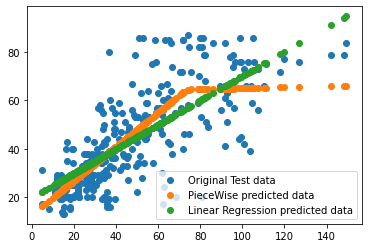

In [32]:
plt.scatter(PieceWise_Test_x, PieceWise_Test_y)

plt.scatter(PieceWise_Test_x, PieceWise_Test_y_hat)
plt.scatter(Linear_test_x, Linear_test_y_hat)
plt.legend(["Original Test data","PieceWise predicted data", "Linear Regression predicted data"])



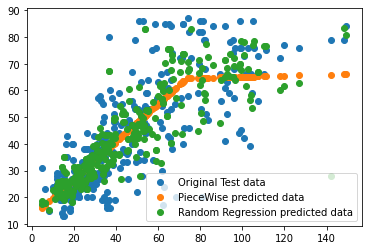

In [33]:
plt.scatter(PieceWise_Test_x, PieceWise_Test_y)
plt.scatter(PieceWise_Test_x, PieceWise_Test_y_hat)
plt.scatter(Random_test_x, Random_test_y_hat)
plt.legend(["Original Test data","PieceWise predicted data", "Random Regression predicted data"])

In [34]:
#5, 45, 70
msk = (np.random.rand(len(df)) < 0.8)
train = df[msk]
test = df[~msk]

In [35]:
# train_1 = train[train['PM2.5_2'] < 5]
# train_2 = train[(train['PM2.5_2'] < 45) & (train['PM2.5_2'] >= 5)]
train_3 = train[(train['PM2.5_2'] < 70)]
train_4 = train[train['PM2.5_2'] >= 70]

# test_1 = test[test['PM2.5_2'] < 5]
# test_2 = test[(test['PM2.5_2'] < 45) & (test['PM2.5_2'] >= 5)]
test_3 = test[(test['PM2.5_2'] < 70)]
test_4 = test[test['PM2.5_2'] >= 70]


****************** <70 ******************* 
R2  0.5220263236136983
MAE of simple linear regression 8.096646396904585
MSE of simple linear regression 118.4606193435122
RMSE of simple linear regression 10.883961564775586
****************** >70 ******************* 
R2  -0.08516096842942655
MAE of simple linear regression 12.47634834282794
MSE of simple linear regression 206.1795242740828
RMSE of simple linear regression 14.358952756872029


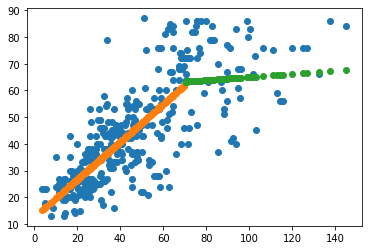

R2  0.5860374801888646
MAE of simple linear regression 9.536021319706968
MSE of simple linear regression 154.89684851380056
RMSE of simple linear regression 12.445756245154433
R2  0.44978186257224484
MAE of simple linear regression 10.584627870537611
MSE of simple linear regression 205.88109165432695
RMSE of simple linear regression 14.348557127959834


<ipython-input-46-3928037ef7b8>:66: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


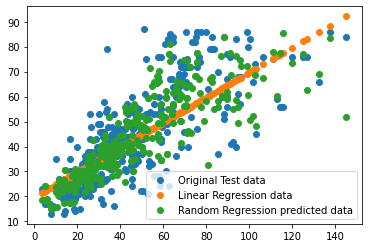

In [46]:
train_x = train[['PM2.5_2']]
train_y = train[['cpcb_pm25']]
test_x = test[['PM2.5_2']]
test_y = test[['cpcb_pm25']]

# train_x_1 = train_1[['PM2.5_2']]
# train_y_1 = train_1[['cpcb_pm25']]
# train_x_2 = train_2[['PM2.5_2']]
# train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2']]
train_y_4 = train_4[['cpcb_pm25']]

# test_x_1 = test_1[['PM2.5_2']]
# test_y_1 = test_1[['cpcb_pm25']]
# test_x_2 = test_2[['PM2.5_2']]
# test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2']]
test_y_4 = test_4[['cpcb_pm25']]
# print("****************** <5 ******************* ")
# regr_1 = linear_model.LinearRegression()
# regr_1.fit (train_x_1, train_y_1)
# test_y_hat_1 = regr_1.predict(test_x_1)
# metrics_print(test_y_1, test_y_hat_1)

# print("****************** <45 ******************* ")
# regr_2 = linear_model.LinearRegression()
# regr_2.fit (train_x_2, train_y_2)
# test_y_hat_2 = regr_2.predict(test_x_2)
# metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)

plt.scatter(test_x['PM2.5_2'], test_y)
# plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
# plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)
plt.show()
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x, test_y)
plt.scatter(Linear_test_x, Linear_test_y_hat)
plt.scatter(Random_test_x, Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])

****************** <70 ******************* 
R2  0.6262779847536774
MAE of simple linear regression 7.1178385624460505
MSE of simple linear regression 92.62296979008627
RMSE of simple linear regression 9.624082802536888
****************** >70 ******************* 
R2  0.36185414256580484
MAE of simple linear regression 9.14345426444522
MSE of simple linear regression 121.24708972318318
RMSE of simple linear regression 11.011225623116765


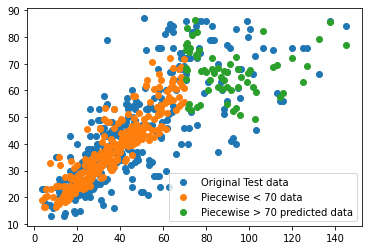

R2  0.7149310755554512
MAE of simple linear regression 7.845496930353898
MSE of simple linear regression 106.66733313398765
RMSE of simple linear regression 10.327987855046484
R2  0.9346110903812088
MAE of simple linear regression 3.329512893982808
MSE of simple linear regression 24.467277936962752
RMSE of simple linear regression 4.946440936366546


<ipython-input-47-68243f953d3a>:68: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


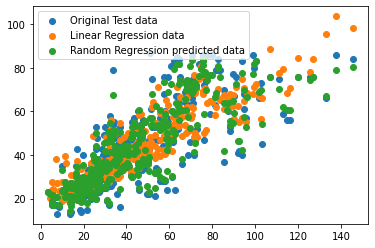

In [47]:
train_x = test[['PM2.5_2', 'PM10_2']]
train_y = test[['cpcb_pm25']]
test_x = test[['PM2.5_2', 'PM10_2']]
test_y = test[['cpcb_pm25']]

# train_x_1 = train_1[['PM2.5_2', 'PM10_2']]
# train_y_1 = train_1[['cpcb_pm25']]
# train_x_2 = train_2[['PM2.5_2', 'PM10_2']]
# train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2', 'PM10_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2', 'PM10_2']]
train_y_4 = train_4[['cpcb_pm25']]

# test_x_1 = test_1[['PM2.5_2', 'PM10_2']]
# test_y_1 = test_1[['cpcb_pm25']]
# test_x_2 = test_2[['PM2.5_2', 'PM10_2']]
# test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2', 'PM10_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2', 'PM10_2']]
test_y_4 = test_4[['cpcb_pm25']]

# print("****************** <5 ******************* ")
# regr_1 = linear_model.LinearRegression()
# regr_1.fit (train_x_1, train_y_1)
# test_y_hat_1 = regr_1.predict(test_x_1)
# metrics_print(test_y_1, test_y_hat_1)

# print("****************** <45 ******************* ")
# regr_2 = linear_model.LinearRegression()
# regr_2.fit (train_x_2, train_y_2)
# test_y_hat_2 = regr_2.predict(test_x_2)
# metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)
plt.scatter(test_x['PM2.5_2'], test_y)
# plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
# plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)
plt.legend(["Original Test data","Piecewise < 70 data", "Piecewise > 70 predicted data"])
plt.show()

regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(Linear_test_x['PM2.5_2'], Linear_test_y_hat)
plt.scatter(Random_test_x['PM2.5_2'], Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])

In [40]:
## "For Random Forest algorithm"
y_pred = regressor.predict(train_x)
metrics_print(train_y, y_pred)

R2  0.9346110903812088
MAE of simple linear regression 3.329512893982808
MSE of simple linear regression 24.467277936962752
RMSE of simple linear regression 4.946440936366546


****************** <70 ******************* 
R2  0.6143146302924823
MAE of simple linear regression 7.105211806933837
MSE of simple linear regression 95.58795813340615
RMSE of simple linear regression 9.7769094366986
****************** >70 ******************* 
R2  0.2293410823849955
MAE of simple linear regression 9.98083219799856
MSE of simple linear regression 146.42444175025162
RMSE of simple linear regression 12.10059675182392


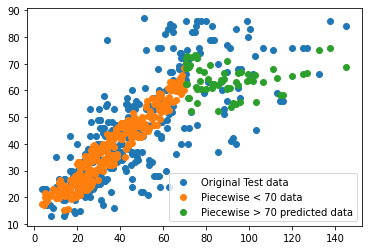

R2  0.6590972629189767
MAE of simple linear regression 8.636901537591445
MSE of simple linear regression 127.55927673759132
RMSE of simple linear regression 11.29421430368626
R2  0.7516010474200648
MAE of simple linear regression 7.049856733524357
MSE of simple linear regression 92.94613180515759
RMSE of simple linear regression 9.640857420642503


<ipython-input-41-9a762b30075e>:68: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


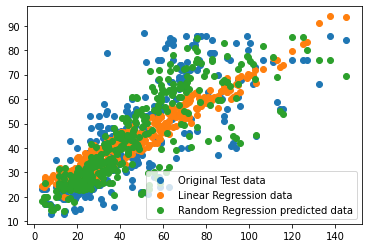

In [41]:
train_x = train[['PM2.5_2', 'RH_2']]
train_y = train[['cpcb_pm25']]
test_x = test[['PM2.5_2', 'RH_2']]
test_y = test[['cpcb_pm25']]

# train_x_1 = train_1[['PM2.5_2', 'RH_2']]
# train_y_1 = train_1[['cpcb_pm25']]
# train_x_2 = train_2[['PM2.5_2', 'RH_2']]
# train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2', 'RH_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2', 'RH_2']]
train_y_4 = train_4[['cpcb_pm25']]

# test_x_1 = test_1[['PM2.5_2', 'RH_2']]
# test_y_1 = test_1[['cpcb_pm25']]
# test_x_2 = test_2[['PM2.5_2', 'RH_2']]
# test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2', 'RH_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2', 'RH_2']]
test_y_4 = test_4[['cpcb_pm25']]
# print("****************** <5 ******************* ")
# regr_1 = linear_model.LinearRegression()
# regr_1.fit (train_x_1, train_y_1)
# test_y_hat_1 = regr_1.predict(test_x_1)
# metrics_print(test_y_1, test_y_hat_1)

# print("****************** <45 ******************* ")
# regr_2 = linear_model.LinearRegression()
# regr_2.fit (train_x_2, train_y_2)
# test_y_hat_2 = regr_2.predict(test_x_2)
# metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)

plt.scatter(test_x['PM2.5_2'], test_y)
# plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
# plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)
plt.legend(["Original Test data","Piecewise < 70 data", "Piecewise > 70 predicted data"])
plt.show()

regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(Linear_test_x['PM2.5_2'], Linear_test_y_hat)
plt.scatter(Random_test_x['PM2.5_2'], Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])


****************** <70 ******************* 
R2  0.6449558911902155
MAE of simple linear regression 6.829723086165898
MSE of simple linear regression 87.99385217582619
RMSE of simple linear regression 9.380503833794121
****************** >70 ******************* 
R2  0.09785252606698203
MAE of simple linear regression 10.33349398325112
MSE of simple linear regression 171.4071390438809
RMSE of simple linear regression 13.092254925866701


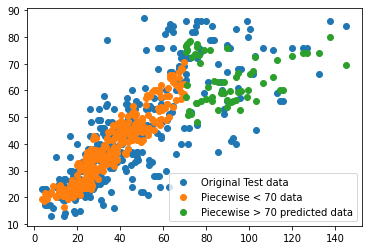

R2  0.7039367449986698
MAE of simple linear regression 7.9683290985247535
MSE of simple linear regression 110.78120111300511
RMSE of simple linear regression 10.525264895146588
R2  0.8044252806578397
MAE of simple linear regression 5.949283667621777
MSE of simple linear regression 73.18031518624642
RMSE of simple linear regression 8.554549385341486


<ipython-input-42-614846250d90>:69: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


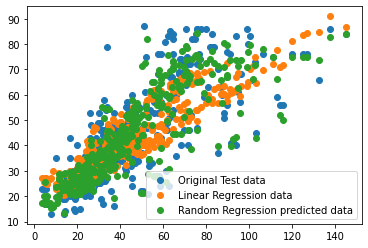

In [42]:
train_x = train[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y = train[['cpcb_pm25']]
test_x = test[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y = test[['cpcb_pm25']]

# train_x_1 = train_1[['PM2.5_2', 'RH_2', 'Temp_2']]
# train_y_1 = train_1[['cpcb_pm25']]
# train_x_2 = train_2[['PM2.5_2', 'RH_2', 'Temp_2']]
# train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y_4 = train_4[['cpcb_pm25']]

# test_x_1 = test_1[['PM2.5_2', 'RH_2', 'Temp_2']]
# test_y_1 = test_1[['cpcb_pm25']]
# test_x_2 = test_2[['PM2.5_2', 'RH_2', 'Temp_2']]
# test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y_4 = test_4[['cpcb_pm25']]
# print("****************** <5 ******************* ")
# regr_1 = linear_model.LinearRegression()
# regr_1.fit (train_x_1, train_y_1)
# test_y_hat_1 = regr_1.predict(test_x_1)
# metrics_print(test_y_1, test_y_hat_1)

# print("****************** <45 ******************* ")
# regr_2 = linear_model.LinearRegression()
# regr_2.fit (train_x_2, train_y_2)
# test_y_hat_2 = regr_2.predict(test_x_2)
# metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)

plt.scatter(test_x['PM2.5_2'], test_y)
# plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
# plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)
plt.legend(["Original Test data","Piecewise < 70 data", "Piecewise > 70 predicted data"])

plt.show()

regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(Linear_test_x['PM2.5_2'], Linear_test_y_hat)
plt.scatter(Random_test_x['PM2.5_2'], Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])

